In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
def read_complex_bytev2(filename, M=-1):
    data = np.fromfile(filename, dtype=np.dtype('B'), count=M)
    normdata=(np.array(data, dtype=float)-127)/128
    normdata.dtype=complex
    return normdata

In [3]:
x = read_complex_bytev2('capture1.bin')
fs = 2e6

In [4]:
N = 500000
bs = 256  # batch size
overlap = 128  # corresponds to maximum timeshift
nbatches = int(np.floor((N-overlap)/bs)) # number of batches

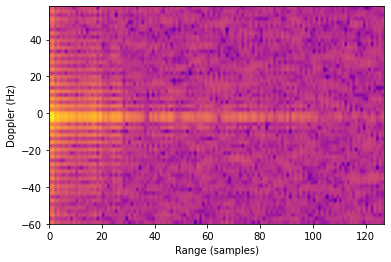

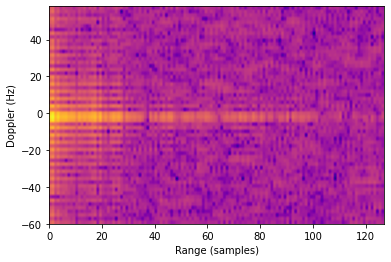

KeyboardInterrupt: 

In [6]:
# Algorithm 2:
# a range doppler map (correlation in both time and frequency)
# using the fft correlation
figNum = 1
for i in np.arange(0, 122880000, 80000):
    frame = (x[i: i + N]).copy()

    fmap = np.arange(-60, 60, 2)  # select some frequency bins
    t = np.arange(N)/fs

    rdmapX = np.zeros((len(fmap), len(frame)), dtype=complex)

    nn2F = np.conj(np.fft.fft(frame))

    # for each frequency offset, calculate the time correlation
    for fi in range(len(fmap)):
        f = fmap[fi]
        nnf = frame * np.exp(1j*2*np.pi*-f*t)

        rdmapX[fi,:] = np.fft.ifft(np.fft.fft(nnf) * nn2F)  # fft correlation

    # figure of RDMAP made using traditional FFT etc
    stRDmap = np.zeros((nbatches, overlap))
    sdata = np.size(stRDmap)
    gridx = np.arange(0, overlap)
    gridy = fmap

    rdmapXTRUNC = rdmapX[:, 1:overlap]  # only need the first 'overlap' samples
    plt.imshow(10*np.log10(np.abs(rdmapXTRUNC)), extent=[np.min(gridx), np.max(gridx), np.min(gridy), np.max(gridy)], aspect='auto', cmap='plasma')
    plt.xlabel('Range (samples)')
    plt.ylabel('Doppler (Hz)')
    plt.show()
    # plt.savefig('{}.png'.format(figNum))
    # figNum = figNum + 1
